In [1]:
# !pip install -U ogb

In [2]:
import ogb
import ssl
import pandas as pd
import pickle
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc, rcParams
import numpy as np

In [3]:
# check the font !!!!!!!!!!!!!!!!!!!!!
# switch to Arial
# if not working: delet ~/.catch/matplotlib

plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()

# rc('font', weight='bold')
# fig, ax = plt.subplots(figsize=(5, 4))
# plt.scatter([10, 55], [10, 55])
# ax.tick_params(axis='both', length=0, width=1.5, colors='black', grid_alpha=0, labelsize=20)
# plt.xlabel('!!!Ariaaaal', fontname='Arial', fontsize=50)

In [3]:
print(ogb.__version__)
ssl._create_default_https_context = ssl._create_unverified_context

1.3.6


In [4]:
from ogb.lsc import PCQM4Mv2Dataset
dataset = PCQM4Mv2Dataset(root = 'Data' , only_smiles = True)

In [7]:
# Initialize lists to store SMILES strings and labels
data_list = []

# Loop through the dataset to populate the list
for data_point in dataset:
    smiles, label = data_point
    data_list.append([smiles, label])

# Convert list of lists to DataFrame
df = pd.DataFrame(data_list, columns=['SMILES', 'Label'])

# Save the DataFrame to a CSV file
df.to_csv('Data\PCQM4Mv2Dataset.csv', index=False)

# Show the DataFrame
print(df.head())

                                  SMILES     Label
0  O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C  3.047675
1          COc1cc(OC)ccc1/C=C/N(C(=O)C)C  4.410966
2            C=CCN(C(=O)C)/C=C/c1ccccc1C  4.639541
3            C=CCN(C(=O)C)/C=C/c1ccccc1F  4.492600
4           C=CCN(C(=O)C)/C=C/c1ccccc1Cl  4.612330


In [8]:
# Sort the DataFrame based on the 'Label' column, in ascending order
sorted_df = df.sort_values(by='Label', ascending=True)

# Show the sorted DataFrame
print(sorted_df.head())

                               SMILES     Label
1742663           [CH]c1ccc(s1)C(=O)O  0.375517
1737445                  N[CH]SS[CH]N  0.386402
102274   C/C=C/c1oc2c(c1C)ccc(c2)[CH]  0.410892
3129826          [CH2]c1cccc(c1)[CH2]  0.413613
1687505  [CH]c1cccc2c1ccc1c2cccc1[CH]  0.435382


In [10]:
# Split the DataFrame into 4 parts with 1,000,000 rows each
df1 = sorted_df.iloc[:250000]
# df2 = sorted_df.iloc[1000000:2000000]
# df3 = sorted_df.iloc[2000000:3000000]
# df4 = sorted_df.iloc[3000000:4000000]

# Save these parts into separate CSV files
df1.to_csv('Data/Dataset250ksamples.csv', index=False)
# df2.to_csv('your_file_part2.csv', index=False)
# df3.to_csv('your_file_part3.csv', index=False)
# df4.to_csv('your_file_part4.csv', index=False)

In [3]:
with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)
tokenizer[0] = ' '

print(tokenizer)

{1: 'C', 2: 'c', 3: '(', 4: ')', 5: '1', 6: 'O', 7: '=', 8: '.', 9: 'N', 10: '2', 11: '[', 12: ']', 13: 'n', 14: '3', 15: 'H', 16: 'S', 17: '-', 18: '#', 19: '+', 20: 's', 21: 'o', 22: 'P', 23: 'F', 24: '4', 25: 'l', 26: 'p', 0: ' '}


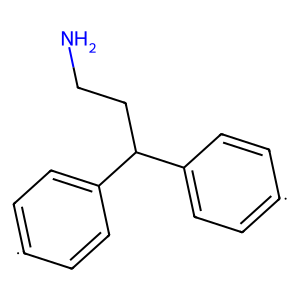

In [2]:
# Create RDKit molecule object from SMILES string
mol = Chem.MolFromSmiles("NCC[C@H](C1=CC=[C]C=C1)C1=CC=[C]C=C1")
# Generate a depiction of the molecule
Draw.MolToImage(mol)

In [28]:
import csv
with open(r'D:\Studies\PHD\Research\Study\Study 4.1\Experiments\200ksamples.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')

print(spamreader)

In [29]:
with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\image_train1.pickle', 'rb') as f:
     alldata = pickle.load(f)
    #X_smiles_train1, SMILES_train1, y_train1 = pickle.load(f)

In [3]:
import pickle
import numpy as np

# Load the tokenizer
with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)
tokenizer[0] = ' '

print(tokenizer)

# Inverse tokenizer for mapping symbols to integers
inv_tokenizer = {v: k for k, v in tokenizer.items()}

{1: 'C', 2: 'c', 3: '(', 4: ')', 5: '1', 6: 'O', 7: '=', 8: '.', 9: 'N', 10: '2', 11: '[', 12: ']', 13: 'n', 14: '3', 15: 'H', 16: 'S', 17: '-', 18: '#', 19: '+', 20: 's', 21: 'o', 22: 'P', 23: 'F', 24: '4', 25: 'l', 26: 'p', 0: ' '}


In [34]:
import pickle
import numpy as np

# Load the tokenizer
with open(r'D:\Studies\PHD\Research\Study\Study 4\RRCGAN_Molecules_Ehl-main\data\trainingsets\train_regular_pubqc130K\tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)
tokenizer[0] = ' '

# Inverse tokenizer for mapping symbols to integers
inv_tokenizer = {v: k for k, v in tokenizer.items()}

# Define max_length as 40
max_length = 40

def smiles_to_one_hot(smiles, tokenizer, inv_tokenizer, max_length):
    # Pad the smiles string to ensure it's of length 40
    smiles = smiles.ljust(max_length)
    
    # Convert the SMILES string to integer representation
    int_representation = [inv_tokenizer.get(symbol, 0) for symbol in smiles]  # using get() to avoid KeyError
    
    # One-hot encoding
    one_hot = np.zeros((max_length, len(tokenizer)))
    for i, integer in enumerate(int_representation):
        one_hot[i, integer] = 1
    
    return one_hot

# Your sample data
data = [
    ("[CH]c1ccc(s1)C(=O)O", 0.375517114),
    ("N[CH]SS[CH]N", 0.386401668),
    # ... Add the rest of your data here ...
]

# Extract SMILES strings and HOMO-LUMO gaps
smiles_strings = [item[0] for item in data]
values = [item[1] for item in data]

# Convert the SMILES strings to one-hot encoding
#one_hot_encoded_data = [smiles_to_one_hot(smiles, tokenizer, inv_tokenizer) for smiles in smiles_strings]

# Convert the SMILES strings to one-hot encoding
one_hot_encoded_data = [smiles_to_one_hot(smiles, tokenizer, inv_tokenizer, max_length) for smiles in smiles_strings]

# Create the data structure to be saved
alldata = (one_hot_encoded_data, smiles_strings, values)

# Save as pickle file
with open('your_output_path.pickle', 'wb') as f:
    pickle.dump(alldata, f)

In [35]:
with open('your_output_path.pickle', 'rb') as f:
        X_smiles_train1, SMILES_train1, y_train1 = pickle.load(f)

In [43]:
print(X_smiles_train1[0].shape)
print(SMILES_train1[1])
print(y_train1[1])


(40, 27)
N[CH]SS[CH]N
0.386401668


0.386401668


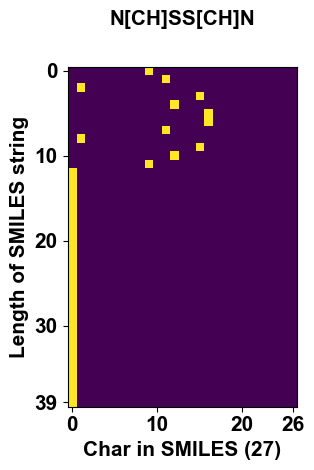

In [37]:
plt.imshow(X_smiles_train1[1].reshape([40, 27]), )
plt.title(SMILES_train1[1], fontfamily='Arial', fontsize=15, fontweight='bold', pad=30)
plt.xlabel('Char in SMILES (27)', fontfamily='Arial', fontsize=15, fontweight='bold'), 
plt.ylabel('Length of SMILES string', fontfamily='Arial', fontsize=15, fontweight='bold')
plt.xticks((0, 10, 20, 26), size=15)
plt.yticks((0, 10, 20, 30, 39), size=15)
plt.tight_layout()
plt.tight_layout()
# plt.savefig('./../data/nns3/ep4/sample_smiles_{}'.format(SMILES_train1[0]), dpi=500)
print (y_train1[1])